In [1]:
import numpy as np
import teenygrad
from teenygrad import nn
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

#### Dataset

Make a dataset using `make_moons()` and plot it.

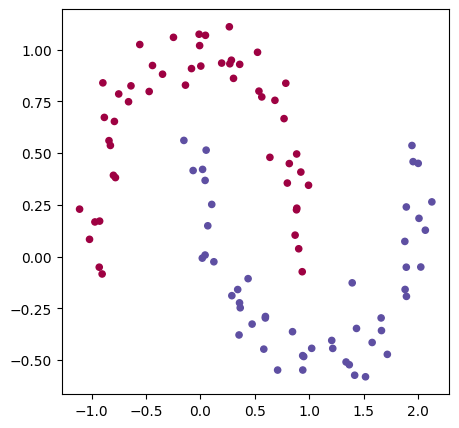

In [2]:
X_np, y_np = make_moons(n_samples=100, noise=0.1)
plt.figure(figsize=(5,5))
plt.scatter(X_np[:,0], X_np[:,1], c=y_np, s=20, cmap='Spectral')

#### Define Model

Define a simple network containing 2 hidden layers of 16 nodes (using ReLU for non-linearity) and a final sigmoid output.

In [14]:
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid(),
)

X = teenygrad.Tensor(X_np)
y = teenygrad.Tensor(y_np.reshape(X_np.shape[0], 1))

#### Train Model

Train the neural network using binary cross-entropy loss.

In [15]:
def binary_cross_entropy(actual, estimated):
    return -(actual * estimated.log() + (1 - actual) * (1 - estimated).log())

for k in range(1000):
    # Forwards pass.
    y_est = model.forward(X)
    loss = binary_cross_entropy(y, y_est).sum() / X.shape[0]

    # Backwards pass.
    model.zero_grad()
    loss.backward()

    # Update weights.
    learning_rate = 0.5
    for p in model.parameters():
        p.value -= learning_rate * p.grad

    if k % 100 == 0:
        print(f"step {k} loss {loss.value}")

step 0 loss 1.648127347177647
step 100 loss 0.03007908485192129
step 200 loss 0.010115710637585483
step 300 loss 0.005489378725421334
step 400 loss 0.0035184649292887204
step 500 loss 0.0025548115133746615
step 600 loss 0.0019844772951794535
step 700 loss 0.0016088939922647642
step 800 loss 0.0013380176806751904
step 900 loss 0.0011398474435406927


#### Plot Model

Plot a contour graph showing the resulting trained model.

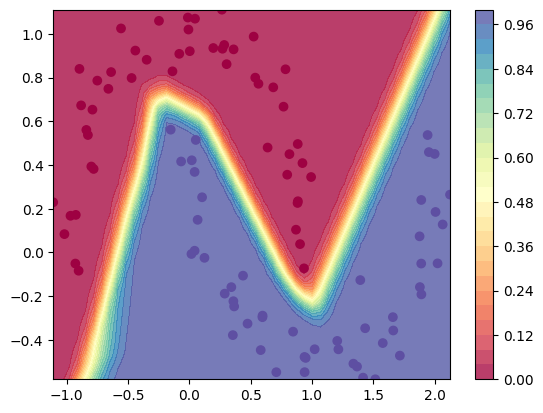

In [13]:
x0_range = np.linspace(X_np[:, 0].min(), X_np[:, 0].max(), 50)
x1_range = np.linspace(X_np[:, 1].min(), X_np[:, 1].max(), 50)
x0, x1 = np.meshgrid(x0_range, x1_range)
X_mesh_tensor = teenygrad.Tensor(np.stack([x0.flatten(), x1.flatten()], axis=-1))
y_mesh = model.forward(X_mesh_tensor).value.reshape(x0.shape)

c = plt.contourf(x0, x1, y_mesh, cmap='Spectral', levels=30, alpha=0.8)
plt.scatter(X.value[:, 0], X.value[:, 1], c=y.value, cmap='Spectral')
plt.colorbar(c)